* Use the snb-data-zimoma-en-all-20170502_1430.csv file to produce the following

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv("data/snb-data-zimoma-en-all-20170502_1430.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head(5)

,Date,D0,Value
0,1972-01-01,SARON,NaN
1,1972-01-01,1TGT,0.0
2,1972-01-01,EG3M,NaN
3,1972-01-01,1M,NaN
4,1972-01-01,3M0,NaN


### Plots

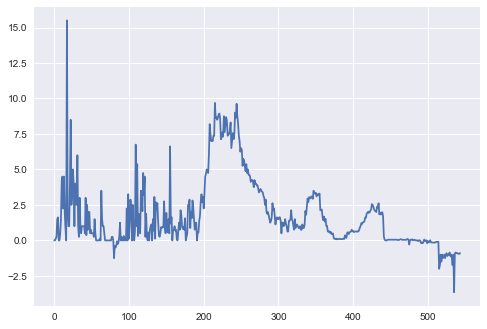

In [30]:
# Line chart of the ‘1TGT’ series
tgt1_df = df[df.D0 == '1TGT'].copy()
timeseries = [x for x in range(0,len(tgt1_df))]

plt.plot(timeseries, tgt1_df.Value)
None

In [180]:
# Box plots of all series 
boxplot_df = df.reset_index()
boxplot_df.set_index(['Date', 'D0'], inplace=True)

boxplot_df.sort_index(inplace=True)
bp_df = boxplot_df.unstack()['Value'].reset_index()

columns = bp_df.columns[1:].tolist()

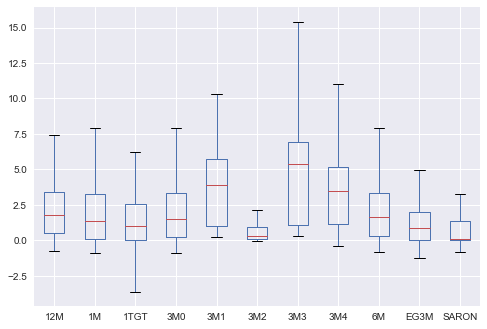

In [182]:
ax = bp_df.plot.box(y=columns)
None

In [25]:
# Scatter plot each of the different 3-month rates
scatter_df = df.copy().reset_index()
scatter_df.set_index(['Date', 'D0'], inplace=True)
scatter_df.sort_index(inplace=True)
sp_df = scatter_df.unstack()['Value'].reset_index()

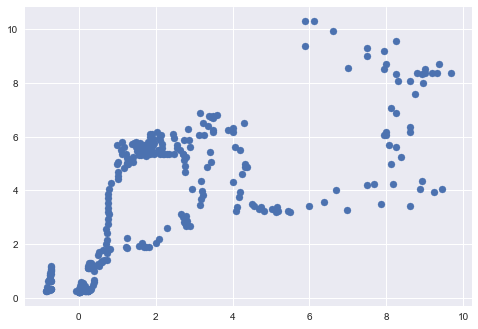

In [26]:
plt.scatter(x=sp_df['3M0'], y=sp_df['3M1'])
None

In [38]:
# Bar plot of avg 1TGT rates per year
barplot_df = df.loc[df.D0 == '1TGT'].copy()

barplot_df['year'] = [x for x in barplot_df.Date.dt.year]

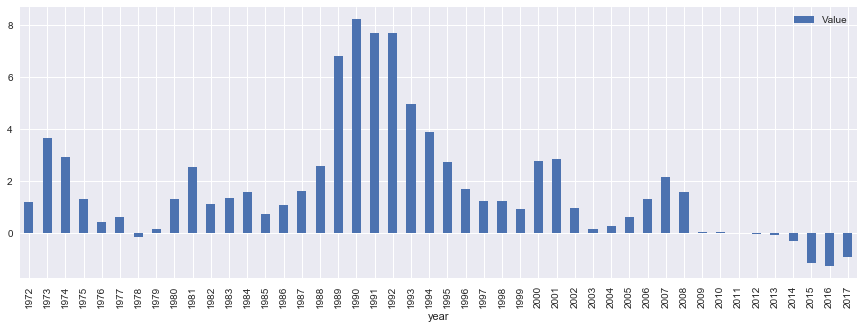

In [56]:
plt.figure(figsize=(20,20))

barplot_df.groupby('year').mean().plot.bar(figsize=(15,5))
None

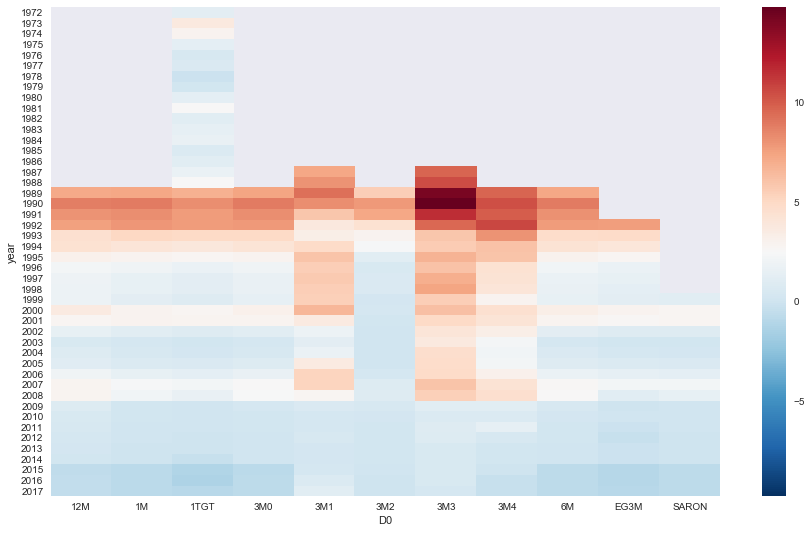

In [191]:
# Heatmap of money-market rates
heat_df = df.copy()
heat_df['year'] = [x for x in heat_df.Date.dt.year]
heat_df = heat_df.drop('Date', 1)

hm_df = heat_df.groupby(['year', 'D0']).mean().sort_index().unstack()['Value']

plt.figure(figsize=(15,9))
ax = sns.heatmap(hm_df, yticklabels=labels, center=hm_df.stack().mean())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


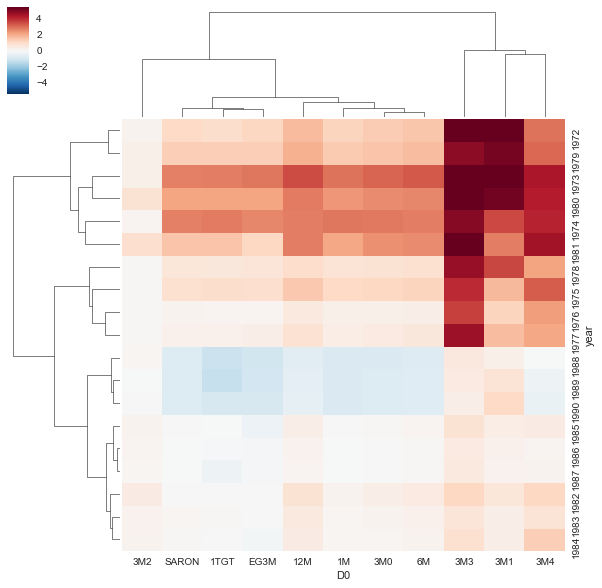

In [195]:
# Clustered heatmap of money-market rates -> Using the same dataset above
cg = sns.clustermap(hm_df.dropna(), yticklabels=labels, robust=True, figsize=(10, 10))

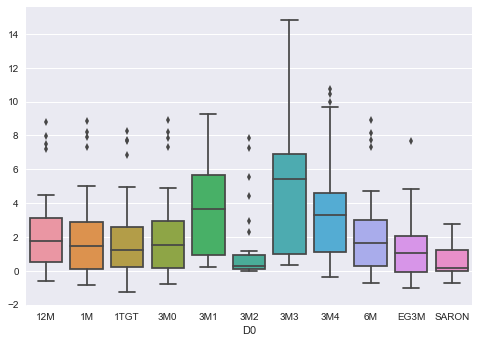

In [196]:
#Box plots with outliers of all series -> Using the dataset above
ax = sns.boxplot(data=hm_df)

In [ ]:
#Time-series plots of all series (using Seaborn)

In [212]:
#time = hm_df.reset_index().year.unique().tolist()
condition = 
ts_ds = hm_df.reset_index()
sns.tsplot(ts_df, time='year', condition="D0", ax=ax)

In [213]:
ts_ds

D0,year,12M,1M,1TGT,3M0,3M1,3M2,3M3,3M4,6M,EG3M,SARON
0,1972,NaN,NaN,1.187500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1973,NaN,NaN,3.677083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1974,NaN,NaN,2.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1975,NaN,NaN,1.302083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1976,NaN,NaN,0.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1977,NaN,NaN,0.635417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1978,NaN,NaN,-0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1979,NaN,NaN,0.145833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1980,NaN,NaN,1.302083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1981,NaN,NaN,2.546875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
# Scatter plot of each of the different 3-month rates, with regression lines -> Using the data above

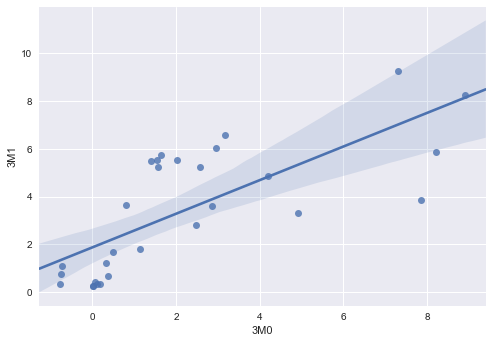

In [198]:
ax = sns.regplot(x='3M0', y='3M1', data=hm_df)

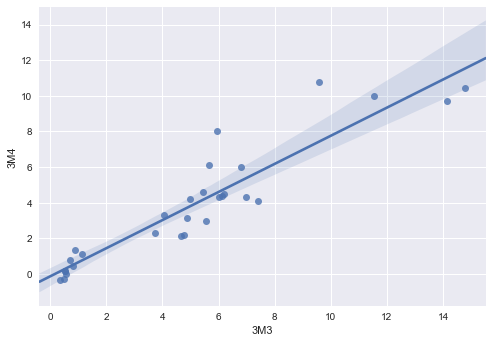

In [199]:
ax = sns.regplot(x='3M3', y='3M4', data=hm_df)

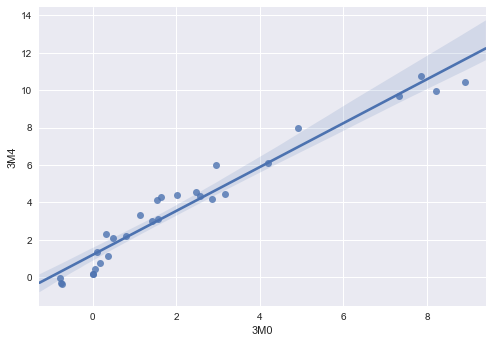

In [200]:
ax = sns.regplot(x='3M0', y='3M4', data=hm_df)